# Assignment Module 1

## Preparation
* Watch the lectures and do the quizes of Module 1.
* Install Pennylane. This notebook is tested with version 0.42.3, but it probably works with other versions aswell.

## Learning outcomes

### Pass-level
* Experience with bra-ket notation.
* Experience with states, qubits and gates.
* Some intuition of expectation values as output of circuits.
* Training a simple parametrized circuit to create a useful circuit.

### Bonus
* Grovers algorithm and some experience of using it.


## Use of generative AI tools

You may use AI-based tools (e.g., ChatGPT, GitHub Copilot, Claude, Gemini, DeepSeek, ...) for brainstorming, refactoring, coding assistance, plotting, or editing.

This is allowed with disclosure. LLMs are a great tool, but you have to make sure to grasp the contents of the course!

**Make sure to fill in the mandatory AI-disclosure in the notebook before submitting!**

In this assignment, most of the code will be provided. To maximize your own learning, it could be a good idea to turn off code assistants such as GitHub Copilot. Furthermore, we do not expect long answers to the text answers, which means LLM:s will not be of much help in refactoring text.

## Preparatory code
Run this to import the modules we need:

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

print("Pennylane version: ", qml.__version__)

Pennylane version:  0.42.3


# Task 1: Get experience with bra-ket notation

Watch the lecture "1.9 Bell States with PennyLane" (a tip is to implement the circuit to get experience with PennyLane yourself). On one of the slides it says that the output of the circuit is $\frac{\ket{00} + \ket{11}}{\sqrt{2}}$. In this task you will show this mathematically.

As shown in the circuit, the input is $\ket{0} \otimes \ket{0}$. Then we apply $H \otimes I$, and finally CNOT.

We can use the formulas of how $H, I$ and $CNOT$ transforms the basis states:

$H\ket{0} = \frac{1}{\sqrt{2}}(\ket{0} + \ket{1})$

$H\ket{1} = \frac{1}{\sqrt{2}}(\ket{0} - \ket{1})$

$I\ket{0} = \ket{0}$

$I\ket{1} = \ket{1}$


$CNOT\ket{00} = \ket{00}$

$CNOT\ket{01} = \ket{01}$

$CNOT\ket{10} = \ket{11}$

$CNOT\ket{11} = \ket{10}$

<div style="max-width: 1200px; margin: auto; border: 1px solid #004791; border-left: 6px solid #004791; border-radius: 6px; padding: 0.8em 1em; background-color: #1b1b1bff; color: #eee;">

### Question 1.1
Show that $CNOT (H \otimes I) (\ket{0} \otimes \ket{0}) = \frac{\ket{00} + \ket{11}}{\sqrt{2}}$ using the linearity of the tensor product and matrix multiplication. (Tip: It is not necessary to explicitly write out the vectors and matrices.) Show your calculations.
</div>

**Answer**: 

We are starting with the state $\ket{\Psi} = \ket{0} \otimes \ket{0}$.

Applying $ H \otimes I $ gives:
$$
\begin{align*}
    (H \otimes I) (\ket{0} \otimes \ket{0}) &= \frac{1}{\sqrt{2}} (\ket{0} + \ket{1}) \otimes \ket{0} \\
    &= \frac{1}{\sqrt{2}} (\ket{00} + \ket{10})
\end{align*}
$$

Now, applying $CNOT$ gives:
$$
\begin{align*}
    \boxed{\ket{\Psi_{\text{final}}} = \frac{1}{\sqrt{2}} (\ket{00} + \ket{11})}
\end{align*}
$$


# Task 2: Train your first quantum circuit

A quantum circuit transforms one input quantum state, to an output quantum state.

An example that we will be studying in this exercise is the so-called *increment circuit*. Given an input in the basis state $\ket{i}$, we want the output state $\ket{i+1 \mod N}$, where $N=2^n$ is the number of basis states. In Pennylane, the qubits are ordered from top to bottom. That is, wire 0 refers to the topmost qubit and wire $n-1$ refers to the bottommost qubit in a $n$-qubit circuit. When interpreted as an integer, wire/qubit 0 is the most significant qubit.

<div style="max-width: 1200px; margin: auto; border: 1px solid #004791; border-left: 6px solid #004791; border-radius: 6px; padding: 0.8em 1em; background-color: #1b1b1bff; color: #eee;">

### Question 2.1
Let `q0` be qubit 0 (the topmost when printing the circuit), `q1` qubit 1 etc. If we initialize the circuit with `q0=0`, `q1=1`, `q2=1`, which output state do we want from the increment circuit?
</div>

**Answer**:

We are starting with the state $\ket{011} = \ket{3}$. Adding one to this we expect to $\ket{100} = \ket{4}$. The number of wires will automatically take the $\mod{N}$ into account with rollover.

If we know which output state we want, given a certain input, but not exactly which quantum circuit to use to reach that output, we can use a *parametrized circuit*.

To do this we need some guess of how the quantum circuit would look like, an *ansatz*.

```
0: ─╭|Ψ⟩─╭RX(theta)───────────────────────┤ ╭<𝓗>
1: ─├|Ψ⟩─├●─────────╭RX(theta)────────────┤ ├<𝓗>
2: ─╰|Ψ⟩─╰●─────────╰●──────────RX(theta)─┤ ╰<𝓗>
```
*Figure 1.1: An ansatz of an increment circuit.*

Figure 1.1 shows an ansatz of an increment circuit. ROT-X gates, and controlled-ROT-X gates are used. 
Pennylane has a built-in function [$\texttt{qml.ctrl()}$](https://docs.pennylane.ai/en/stable/code/api/pennylane.ctrl.html) that is useful when dealing with multi-control gates. We also use the function [$\texttt{qml.RX()}$](https://docs.pennylane.ai/en/stable/code/api/pennylane.RX.html). Look up the Pennylane documentation for details.

<div style="max-width: 1200px; margin: auto; border: 1px solid #004791; border-left: 6px solid #004791; border-radius: 6px; padding: 0.8em 1em; background-color: #1b1b1bff; color: #eee;">

### Question 2.2
What is the geometric meaning of ROT-X in the bloch sphere model of a qubit?
</div>

**Answer**:

In the bloch sphere model of a qubit, ROT-X represents a rotation of the qubit state around the $x$-axis by a specified angle $\theta$.

Parametrized rotation gates are often used when building an ansatz circuit. For now you don't need to think about why we choose exactly this ansatz. Your first task is to build the ansatz as shown in Figure 1.1.

In [2]:
# The device we want to use is the default simulator with 3 wires (qubits)
dev = qml.device("default.qubit", wires = 3)

# We tie the quantum function to the device dev
@qml.qnode(dev)
def increment_ansatz(input_state, theta):

    # Initialize to the input state provided
    qml.BasisState(state = input_state, wires = [0,1,2])

    # We apply the first controlled ROT-X
    qml.ctrl(op = qml.RX(theta, wires = 0), control = (1,2))

    # Add the rest of the gates to implement the ansatz in the figure above
    # ---YOUR CODE HERE---
    qml.CRX(theta, wires = (2, 1))

    qml.RX(theta, wires = 2)
    
    # --------------------

    # Expectation value of the output state interpreted as an integer (0-7).
    # (You will learn more about this in later modules.)
    P1 = np.array([[0, 0], [0, 1]])
    return qml.expval(
        4 * qml.Hermitian(P1, wires=0) +
        2 * qml.Hermitian(P1, wires=1) +
        1 * qml.Hermitian(P1, wires=2)
    )

print(qml.draw(increment_ansatz)(3, 42)) # 42 radians is just an arbitrary example

0: ─╭|Ψ⟩─╭RX(42.00)───────────────────────┤ ╭<𝓗>
1: ─├|Ψ⟩─├●─────────╭RX(42.00)────────────┤ ├<𝓗>
2: ─╰|Ψ⟩─╰●─────────╰●──────────RX(42.00)─┤ ╰<𝓗>


Run the code above and check that the printed circuit looks like in Figure 1.1 (but with `theta` replaced with `42`).

Throughout the assignment we will use the `qml.draw` function of PennyLane to draw the ciruits and make sure they look as expected. You are enouraged to play around with the code or try other debugging tools to learn how it's working.

`BasisState` prepares some wires in a computational basis state. It supports the argument `state` to be an integer, which will be interpreted as a binary number as explained above.

Exactly how the expectation value is caluclated/estimated will be covered in later modules.
For now all you need to know is that it returns the statistical expectation value of the output state interpreted as an integer 0-7.

That is, the expectation value is $\Sigma_{x=0}^7 P(\ket{x}) x$, where $P(\ket{x})$ is the probability of measuring the state $\ket{x}$.

For example, if the system before measuring would be in quantum state $\frac{1}{\sqrt{2}} \ket{010} + \frac{1}{\sqrt{2}} \ket{111}$, the expectation value would be:

$\Sigma_{x=0}^7 P(\ket{x}) x = \left(\frac{1}{\sqrt{2}}\right)^2 \cdot 2 + \left(\frac{1}{\sqrt{2}}\right)^2 \cdot 7 = 1 + 3.5 = 4.5$

<div style="max-width: 1200px; margin: auto; border: 1px solid #004791; border-left: 6px solid #004791; border-radius: 6px; padding: 0.8em 1em; background-color: #1b1b1bff; color: #eee;">

### Question 2.3 
If the system before measuring would be in state $\frac{1}{\sqrt{3}} \ket{000} - \frac{1}{\sqrt{3}} i \ket{010} + \frac{1}{\sqrt{3}} i \ket{111}$, what would the returned expectation value be?
</div>

**Answer** :

The expectation value is given by:
$$
\begin{align*}
    \Sigma_{x=0}^7 P(\ket{x}) x &= \left(\frac{1}{\sqrt{3}}\right)^2 \cdot 0 + \left(\frac{1}{\sqrt{3}}\right)^2 \cdot 2 + \left(\frac{1}{\sqrt{3}}\right)^2 \cdot 7 \\
    &= 0 + \frac{2}{3} + \frac{7}{3} \\
    &\boxed{\Sigma_{x=0}^7 P(\ket{x}) x = 3}
\end{align*}
$$


Let's get back to coding. We can check the type of our function `increment_ansatz`:

In [3]:
print(type(increment_ansatz))

<class 'pennylane.workflow.qnode.QNode'>


Since the `increment_ansatz` has been transoformed to a QNode through the declarator `qml.qnode(dev)`, we can simply call it like this:

In [4]:
print(increment_ansatz(input_state=3, theta=42))

3.6999926574941755


If `increment_ansatz` indeed implemented an increment circuit, we would expect the output state to be the basis state $\ket{3+1 \mod 8} = \ket{4}$ and the expectation value should be 4.0. As we can see above, 42 radians was not the correct value for `theta`, since $3+1 \mod 8\neq 3.69$. Therefore, we need to train the model by finding the correct $\theta$.

Usually when training models, we use many known datapoints (pairs of input and output data). In this simple example, it will be enough to use a single datapoint.
We will train the model by running it multiple times with different $\theta$ on a single input value until we find a good value of $\theta$ to solve our task of incrementing the input state. For this task, you can simply try all whole degrees of $\theta$ from 0 to 360. (In later modules, we will explore more sophisticated ways of trying the parameters, taking into consideration the result of our previous runs.)

Some skeleton code is provided below.

In [5]:
# A function that checks the distance between the expectation_value and the correct_output.
def loss_function(expectation_value, correct_output):
    return np.abs(expectation_value - correct_output)

loss_threshold = 0.00001

# Our dataset
input_value = 3
correct_output = 4

for theta_cand_degrees in range(0,360):

    #---YOUR CODE HERE---
    theta_cand_rad = theta_cand_degrees * np.pi / 180
    expectation_value = increment_ansatz(input_state=input_value, theta=theta_cand_rad)
    loss = loss_function(expectation_value=expectation_value, correct_output=correct_output)
    #--------------------

    # When the error is small enough, we say that we have found a good theta
    if loss < loss_threshold:
        trained_theta = theta_cand_rad
        break

print("Trained theta: ", trained_theta, " rad")

Trained theta:  3.141592653589793  rad


Draw the trained circuit:

In [6]:
print(qml.draw(increment_ansatz)(3, trained_theta))

0: ─╭|Ψ⟩─╭RX(3.14)─────────────────────┤ ╭<𝓗>
1: ─├|Ψ⟩─├●────────╭RX(3.14)───────────┤ ├<𝓗>
2: ─╰|Ψ⟩─╰●────────╰●─────────RX(3.14)─┤ ╰<𝓗>


Use the trained circuit on other input data:

In [7]:
print(increment_ansatz(input_state = 1, theta=trained_theta))

2.0


Verify that the output is correct.

<div style="max-width: 1200px; margin: auto; border: 1px solid #004791; border-left: 6px solid #004791; border-radius: 6px; padding: 0.8em 1em; background-color: #1b1b1bff; color: #eee;">

### Question 2.4 
How does ROT-X affect the basis states $\ket{0}$ and $\ket{1}$, given the `trained_theta` received from the training above?
</div>

**Answer**: Given that ```trained_theta``` is equal to $\pi$, the ROT-X is equivalent to an X or NOT gate (takes $\ket{0}$ to $\ket{1}$ and vice-versa).

<div style="max-width: 1200px; margin: auto; border: 1px solid #004791; border-left: 6px solid #004791; border-radius: 6px; padding: 0.8em 1em; background-color: #1b1b1bff; color: #eee;">

### Question 2.5
What is another name of the ROT-X with this specific angle? Is there an equivalent in classical computing?
</div>

**Answer**: Another name for the ROT-X gate with this angle is the NOT gate, which is equivalent to the NOT gate in classical computing.

<div style="max-width: 1200px; margin: auto; border: 1px solid #004791; border-left: 6px solid #004791; border-radius: 6px; padding: 0.8em 1em; background-color: #1b1b1bff; color: #eee;">

### Question 2.6
Following the same structure as our trained circuit in this task, how many gates would we need to build an increment circuit of $n$ qubits? Of which type would the gates be?
</div>

**Answer**: To build an increment circuit of $n$ qubits we would need $3n$ gates which would all NOT gates (of type ROT-X with an angle $\pi$).

<div style="max-width: 1200px; margin: auto; border: 1px solid #004791; border-left: 6px solid #004791; border-radius: 6px; padding: 0.8em 1em; background-color: #1b1b1bff; color: #eee;">

###  Optional question
Was there any part of the mandatory tasks of the assignment where you struggled for some "unnecessary" reason? (Errors in the notebook, bad instructions etc.)
</div>

**Answer**: No I think it was quite a well written notebook.

# Task 3 (Bonus): Grover's algorithm

As covered in one of the video lectures, Grover's algorithm is a quantum algorithm designed to find a marked item in an unstructured database consisting of $N$ items. Compared to classical search, Grover's algorithm provides a quadratic speedup, allowing us to find the marked item in $\mathcal{O}(\sqrt{N})$ time complexity.

Although we will not cover every element of Grover's algorithm in detail, the purpose of this exercise is to give a good overview of the essential building blocks of the algorithm.

**Tip**: For an intuitive explanation of Grover's algorithm, feel free to look at this video by 3Blue1Brown https://www.youtube.com/watch?v=RQWpF2Gb-gU, as it provides nice visualizations of the mathematical operations involved in the algortihm.

## Problem formulation
Before starting to construct the algorithm itself, let us begin by defining the problem more formally.

We consider an unstructured database of $N = 2^n$ possible items, where each item can be represented by an $n$-bit string $\lvert x \rangle$, with $x \in \{0, 1, \dots, N - 1\}$. Among these items, there exists one (or a small number of) item(s) that satisfy a given condition defined by an *oracle* function:

$$
f(x) = 
\begin{cases}
1, & \text{if } x \text{ fulfills the condition}, \\
0, & \text{otherwise.}
\end{cases}
$$

The condition could for example be...
* ... an equation, such as $x^2=4$,
* ... or a boolean formula on the individual bits, such as $(x_0 \lor x_1) \land (x_2 \lor x_0)$.

In our case there will only be one $x^*$ that fulfills the condition. That is, $f(x^*) = 1$, and $f(x) = 0 \text{ for all }  x\neq x^*$.

The condition on $x^\ast$ is often such that it is difficult to obtain $x^*$ just by manipulating the condition (as we would normally solve an equation). Instead the goal of Grover’s algorithm is to find the item $x^\ast$ by *searching* for it. That is, by evaluating $f(x)$ for different values of $x$.

In quantum computing terms, we denote the unknown target basis state as $\ket{\phi} = \ket{x^*}$. This is the state that we want a high probability of measuring at the end of Grover's algorithm. (Note that $x^*$ is often used in the classical setting while $\ket{\phi}$ is used in the quantum setting, but they essentially have the same meaning.)

Classically, identifying $x^\ast$ requires, on average, $\mathcal{O}(N/2)$ oracle queries, since we on average need to search through half of the database.


In quantum computing, we can call the equivalent of $f(x)$ for a superposition of values of $x$ at the same time. Grover’s algorithm lets us measure  $\ket{\phi}$ with high probability in only $\mathcal{O}(\sqrt{N})$ queries by using interference.

## Your task

In this task, your goal is to use Grovers algorithm on $N=2^3=8$ elements to find an $x\in \{0,1,\dots, 7\}$ that fulfills the condition $x+1=4$.

We define the oracle

$$
f(x) = 
\begin{cases}
1, & \text{if } x+1=4, \\
0, & \text{otherwise.}
\end{cases}
$$

This is of course a toy example and, as mentioned, the problems are usually such that we can not easily manipulate the condition $x+1=4$ to find the $x$ fulfilling it. However, the oracle we will implement highlights some aspects of how oracles are usually constructed to use Grovers algorithm for more difficult problems.

If we want to keep the analogy of the unstructured database (which might not be necessary), we could imagine a database with the following table:

| Id            | Data          |
| ------------- | ------------- |
| 0             | 0             |
| 1             | 0             |
| 2             | 0             |
| 3             | 1             |
| 4             | 0             |
| 5             | 0             |
| 6             | 0             |
| 7             | 0             |

The fact that it the database is unstructured means that we have no way of finding the row where `Data=1` other than by a linear search.


Regardless of if you want to look at the problem as searching in a database or searching for the solution of an equation, we can express it in quantum terms as finding the basis state $\ket{\phi}$ such that $\ket{\phi + 1\text{ mod 8 }} = \ket{4}$.

## Step 1: Initialize a uniform superposition

The first step of Grover’s algorithm is to create an equal superposition of all possible states that we want to search through. This is done by applying a Hadamard gate to each qubit, starting from the ground state $|0\rangle^{\otimes n}$:

$$
\lvert \psi_0 \rangle = H^{\otimes n} \lvert 0 \rangle^{\otimes n} 
= \frac{1}{\sqrt{2^n}} \sum_{i=0}^{2^n-1} \lvert i \rangle.
$$

Recall that $\ket{\phi}$ is our unknown target state. Mathematically, can separate the uniform superposition into a sum of two terms: the target state $\lvert \phi \rangle$ and the equal superposition of all remaining basis states (which does not fulfill our condition), which we denote as $\lvert \phi^{\perp} \rangle$. Note that $\ket{\phi}$ and $\ket{\phi^{\perp}}$ are orthogonal, since $\ket{\phi^{\perp}}$ have 0 amplitude on entry $\phi$-entry.

Since there are $2^n - 1$ states that are not solutions, we can write

$$
\lvert \phi^{\perp} \rangle = \frac{1}{\sqrt{2^n - 1}} 
\sum_{i \ne \phi} \lvert i \rangle
$$

to make $\ket{\phi^{\perp}}$ normalized.

Using this, the initial state can be rewritten as

$$
\lvert \psi_0 \rangle 
= \frac{1}{\sqrt{2^n}} \lvert \phi \rangle 
+ \sqrt{\frac{2^n - 1}{2^n}} \, \lvert \phi^{\perp} \rangle.
$$

Since $\ket{\phi}$ and $\ket{\phi^\perp}$ are both orthogonal and normalized, and therefore orthonormal, we can view $\ket{\psi_0}$ as a vector in the two-dimensional plane spanned by $\{ \lvert \phi \rangle, \lvert \phi^{\perp} \rangle \}$. It is more convenient to do this using an angle $\theta$, specifically

$$
\lvert \psi_0 \rangle = 
\sin(\theta)\lvert \phi \rangle + 
\cos(\theta)\lvert \phi^{\perp} \rangle.
$$

That is, $\lvert \psi_0 \rangle$ is a vector lying in the two-dimensional plane spanned by 
$\{ \lvert \phi \rangle, \lvert \phi^{\perp} \rangle \}$, rotated $\theta$ radians anti-clockwise from the $\lvert \phi^{\perp} \rangle$-axis towards the $\lvert \phi \rangle$-axis. 
This representation will be useful later when analyzing how Grover’s algorithm amplifies the amplitude of the target state by iteratively rotating the state closer to the $\lvert \phi \rangle$-axis.

<div align="center">
  <img src="ampamp1.jpeg" alt="Oracle circuit example" width="400"/>
  <p><em>Source: https://pennylane.ai/qml/demos/tutorial_intro_amplitude_amplification</em></p>
</div>

<div style="max-width: 1200px; margin: auto; border: 1px solid #004791; border-left: 6px solid #004791; border-radius: 6px; padding: 0.8em 1em; background-color: #1b1b1bff; color: #eee;">

### Question B1.1

Express the initial angle $\theta$ in terms of the number of qubits $n$. What is the initial angle for the particular case of $n = 3$ qubits?
</div>

**Answer**: The initial angle $\theta$ is given according to the following:

$$
\begin{align*}
    \sin{\theta} &= \frac{1}{\sqrt{2^n}} \\
    \Rightarrow & \boxed{\theta = \arcsin{\frac{1}{\sqrt{2^n}}}}
\end{align*}
$$

So for the case of $n = 3$ qubits the initial angle $\theta$ is given by:
$$
\begin{align*}
    \theta &= \arcsin{\frac{1}{\sqrt{2^n}}} \\
    &= \arcsin{\frac{1}{\sqrt{2^3}}} \\ 
    \theta &\approx 0.361
\end{align*}
$$

**Your task**: Add the missing parts to the code below to correctly perform the state initialization on 3 qubits, by applying a Hadamard gate to each qubit.

In [8]:
def initialize_superposition():
    # ---YOUR CODE HERE---
    for i in range(3):
        qml.Hadamard(wires=i)
    
    # --------------------
    return

# Print the circuit
print(qml.draw(initialize_superposition)())

# Test the function
dev = qml.device("default.qubit", wires=3)
@qml.qnode(dev)
def test_initialize_superposition():
    initialize_superposition()
    return qml.state()

assert np.allclose(test_initialize_superposition(), np.array([1/np.sqrt(8)]*8)), "The superposition state is incorrect."
assert test_initialize_superposition().shape == (8,), "The output state should have 8 amplitudes for 3 qubits."

0: ──H─┤  
1: ──H─┤  
2: ──H─┤  


We can view the quantum state we are in after applying the Hadamard gates by running:

In [9]:
print(test_initialize_superposition())

[0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


## Step 2: Implement the Oracle
The next step is to *mark* the state $\ket{\phi}$ that fulfills the condition $\ket{\phi+1 \mod 8}=\ket{4}$. From the previous step, we have an equal superposition of all possible states. Note that the amplitude of each state is real and positive. In Grover's algorithm, a state is marked by flipping the sign of it's amplitude. We want to apply an operation $R_{\Phi^\bot}$ that flips the sign of the $\ket{\phi}$ component of any given vector. The impact of $R_{\Phi^\bot}$ is visualized in this figure:

<div align="center">
  <img src="ampamp2.jpeg" alt="Oracle circuit example" width="400"/>
  <p><em>Source: https://pennylane.ai/qml/demos/tutorial_intro_amplitude_amplification</em></p>
</div>

That is, we need to implement an operation $R_{\Phi^\bot}$ that flips the amplitude of the state $\ket{\phi}$, but leaves all other basis states untouched.

Formally:

\begin{align*}
R_{\Phi^\bot}\ket{x} &= -\ket{x} &\text{if } x+1 \mod 8=4 \\
R_{\Phi^\bot}\ket{x} &= \ket{x} &\text{if } x+1 \mod 8\neq4
\end{align*}

We will build this incrementally by looking at how to make simpler oracles.

### Oracle for $x=7$ (a particularly simple case)

We start with looking at how to mark the state $\ket{7} = \ket{111}$.

We know that the PauliZ-gate flips the amplitude of the basis state $\ket{1}$:

\begin{align*}
Z\ket{0} &= \ket{0} \\
Z\ket{1} &= -\ket{1}
\end{align*}


Since it behaves like an identity gate when the input is $\ket{0}$, it can be throught of as being controlled also by the target qubit.

Controlled-Z gates only flips the amplitude of the states where all inputs are 1, and leaves all other states untouched.


For example, the CCZ gate
```
0: ─╭●─┤  
1: ─├●─┤  
2: ─╰Z─┤  
```

Flips the amplitude of the state $\ket{111}$. Note that it doesn't matter which qubits are the control qubits and which one is the target, since we noted that the $Z$ gate is controlled also by the target qubit.

Formally we have 

\begin{align*}
CCZ\ket{111} &= -\ket{111} \\
CCZ\ket{x} &= \ket{x} \text{if} \ket{x} \neq \ket{111}.
\end{align*}

That is, CCZ works as an oracle for the condition $x=7$.

We can try to implement it in PennyLane:

In [10]:
# This marks |111> by applying a phase-flip.
def equals_7_oracle():
    qml.ctrl(op = qml.PauliZ, control = (0,1))(wires = 2) # CCZ        |111> -> -|111>
    return

print(qml.draw(equals_7_oracle)())

0: ─╭●─┤  
1: ─├●─┤  
2: ─╰Z─┤  


And test it by applying it to the equal superposition of states that we had from the previous subtask:

In [11]:
# Throughout this task we will use this device
dev = qml.device("default.qubit", wires=3)

# Test the function
@qml.qnode(dev)
def test_equals_7_oracle():
    initialize_superposition()
    equals_7_oracle()                       # Mark |111>
    return qml.state()

print(test_equals_7_oracle())

[ 0.35355339+0.j  0.35355339+0.j  0.35355339+0.j  0.35355339+0.j
  0.35355339+0.j  0.35355339+0.j  0.35355339+0.j -0.35355339+0.j]


As we can note above, the amplitude of state $\ket{7}$ is flipped, while all other remain the same.

### Oracle for $x=5$ (the example from the lecture)
Next, we will in detail describe how the oracle in the lecture is constructed. In slide 5 of the video lecture, we aim to mark the state $\ket{5} = \ket{101}$. That is, we want an oracle $U$ such that

\begin{align}
U\ket{101} &= -\ket{101} \\
U\ket{x} &= \ket{x} \text{if} \ket{x} \neq \ket{101}.
\end{align}

It would be nice if we can reduce our problem to flipping the state $\ket{111}$, since we already know how to solve that one.

We do this by first applying an X gate to qubit 1. We denote this $X_1 = I \otimes X \otimes I$. This transform $\ket{101}$ to $\ket{111}$. All other states $\ket{x} \neq \ket{5}$ will be transformed to some states $\neq \ket{111}$.

Now we can apply our `equals_7_oracle` which transforms $\ket{111}$ to $-\ket{111}$.

Adding these together gives that $\ket{101}$ have been transformed to $-\ket{111}$.

Now we want to restore the effect of the $X_1$ gate in the beginning. Since $X$ gates are their own inverse, we can simply do this by applying another $X_1$ gate. Note that because of linearity of the gate applications $X_1 \left(-\ket{111}\right) = -X_1 \ket{111} = -\ket{101}$.


The function `equals_5_oracle` is the same as in the lecture (but uses our helper function `ccz`). The comments show what happens with the state $\ket{5}$. All other states end up unaltered.

In [12]:
# This marks |101> by applying a phase-flip.
def equals_5_oracle():
    qml.PauliX(wires=1)  # X_1        |101> ->  |111>
    equals_7_oracle()    # CCZ        |111> -> -|111>
    qml.PauliX(wires=1)  # (X_1)^-1  -|111> -> -|101>
    return

# Print the circuit
print(qml.draw(equals_5_oracle)())

0: ────╭●────┤  
1: ──X─├●──X─┤  
2: ────╰Z────┤  


Once again we can test the function by applying it to the equal superposition:

In [13]:
# Test the function
@qml.qnode(dev)
def test_diffusion_operator():
    initialize_superposition()
    equals_5_oracle()
    return qml.state()

print(test_diffusion_operator())

[ 0.35355339+0.j  0.35355339+0.j  0.35355339+0.j  0.35355339+0.j
  0.35355339+0.j -0.35355339+0.j  0.35355339+0.j  0.35355339+0.j]


Note that the sign of state $\ket{5}$ is flipped.

### Oracle for $x=4$
Finally time for you to do some programming again! Now your task is to implement a similar oracle for $x=4$:

In [14]:
# This marks |100> by applying a phase-flip.
# my thinking is just to apply x on q2 to create the state |101> then call the equals 5 oracle
def equals_4_oracle():
    # ---YOUR CODE HERE---
    qml.PauliX(wires=2) # |100> -> |101>
    equals_5_oracle() # |101> -> -|101>
    qml.PauliX(wires=2) # -|101> -> -|100>
    
    # --------------------
    return

# Print the circuit
print(qml.draw(equals_4_oracle)())

# Test the function
dev = qml.device("default.qubit", wires=3)
@qml.qnode(dev)
def test_equals_4_oracle():
    initialize_superposition()
    equals_4_oracle()
    return qml.state()

expected = np.array([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j, -0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j])
assert np.allclose(test_equals_4_oracle(), expected), "The equals 4 operator is incorrect."

0: ────╭●────┤  
1: ──X─├●──X─┤  
2: ──X─╰Z──X─┤  


### Oracle for $x+1=4$
In this case we want to flip the phase only when $x+1=4$. As a reminder, the problem can be formulated as finding an operation $R_{\Phi^\bot}$ such that

\begin{align}
R_{\Phi^\bot}\ket{x} &= -\ket{x} &\text{if } x+1 \mod 8=4 \\
R_{\Phi^\bot}\ket{x} &= \ket{x} &\text{if } x+1 \mod 8\neq4
\end{align}

Once again, it would be convenient if we can use previously defined oracles, such as the `equals_4_oracle` which flips the phase of state $\ket{4}$.

To do this, we need to compute $x+1$ using the increment circuit that we constrcuted in Task 2. Your task is to build it using X gates instead of Rot-X gates.

In [15]:
def increment():
    qml.ctrl(op = qml.X(wires = 0), control = (1,2))
    # ---YOUR CODE HERE---
    qml.CNOT(wires=(2, 1))
    qml.X(wires=2)
    
    # --------------------
    return

# Print the circuit
print(qml.draw(increment)())

# Test function
dev = qml.device("default.qubit", wires=3)
@qml.qnode(dev)
def test_increment():
    qml.BasisState(state = 2, wires = [0,1,2])
    increment()
    return qml.state()

# print(test_increment())

expected = np.array([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])
assert np.allclose(test_increment(), expected), "The increment operator is incorrect."

0: ─╭X───────┤  
1: ─├●─╭X────┤  
2: ─╰●─╰●──X─┤  


After applying the `increment`-circuit, we have retreived mapped $\ket{x}$ to $\ket{x+1 \mod 8}$.

The next step is to call `equals_4_oracle`. If for states $x$ such that $\ket{x+1 \mod 8} = \ket{4}$, the phase will be flipped to $-\ket{x+1 \mod 8}$.

To get $-\ket{x}$ as output, all we have to do now is to do the inverse of the `increment` operation (similarly to why we had to apply the inverse of the X-gates in the previous examples).

Since all gates in `increment` is it's own inverse, we can create the inverse of `invrement` by simply reversing the order of the gate applications:

In [16]:
def increment_inv():
    # ---YOUR CODE HERE---
    qml.X(wires=2)
    qml.CNOT(wires=(2, 1))
    qml.ctrl(op = qml.X(wires = 0), control = (1,2))

    # --------------------
    return

# Print the circuit
print(qml.draw(increment_inv)())

# Test function
dev = qml.device("default.qubit", wires=3)
@qml.qnode(dev)
def test_increment():
    qml.BasisState(state = 3, wires = [0,1,2])
    increment_inv()
    return qml.state()

expected = np.array([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])
assert np.allclose(test_increment(), expected), "The increment_inv operator is incorrect."

0: ───────╭X─┤  
1: ────╭X─├●─┤  
2: ──X─╰●─╰●─┤  


We put together the steps described above:

In [17]:
def oracle():
    increment()
    equals_4_oracle()
    increment_inv()
    return

We test the oracle by applying the steps we have so far: initializing in a superposition of all states, and applying the oracle.

In [18]:
# Test function
dev = qml.device("default.qubit", wires=3)
@qml.qnode(dev)
def test_oracle():
    initialize_superposition()
    oracle()
    return qml.state()

print(test_oracle())

expected = np.array([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j, -0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j])
assert np.allclose(test_oracle(), expected), "The oracle operator is incorrect."

[ 0.35355339+0.j  0.35355339+0.j  0.35355339+0.j -0.35355339+0.j
  0.35355339+0.j  0.35355339+0.j  0.35355339+0.j  0.35355339+0.j]


<div style="max-width: 1200px; margin: auto; border: 1px solid #004791; border-left: 6px solid #004791; border-radius: 6px; padding: 0.8em 1em; background-color: #1b1b1bff; color: #eee;">

### Question B2.1

Observe the output of the last code block. On which state did the oracle flip the sign of the amplitude?
</div>

**Answer**: the oracle flipped the sign of the amplitude on the state $\ket{011} = \ket{3}$, as expected for marking the state $\ket{x+1 \mod 8} = \ket{4}$.

The pattern we have followed is common when implementing oracles for more difficult problems:
1. We apply some operation $U$ to convert our unknown target state $\ket{\phi}$ to something where we know how to flip the amplitude. (For example the state $\ket{111}$.)
2. We flip the amplitude. (For example using $CCX$.)
3. We apply the inverse of $U$.

## Step 3: Implement the diffusion operator

The next step is to implement the diffusion operator. It reflects any state across the axis spanned by the initial uniform state:

$$
\lvert \psi_0 \rangle = \frac{1}{\sqrt{2^n}} \sum_{i=0}^{2^n-1} \lvert i \rangle.
$$

As a linear operator, the diffusion operator can be written as:

$$
D = 2 \lvert \psi_0 \rangle \langle \psi_0 \rvert - I.
$$

In summary:
- The **oracle** acts as a phase flip on the marked component:  
  $O\,\lvert \phi \rangle = -\lvert \phi \rangle$ and $O\,\lvert \phi^{\perp} \rangle = \lvert \phi^{\perp} \rangle$.  
  Geometrically, this is a reflection across the axis spanned by $\lvert \phi^{\perp} \rangle$.
- The **diffusion operator** $D$ is a reflection across the axis spanned by $\lvert \psi_0 \rangle$.

A reflection followed by another reflection in the same 2D plane yields a rotation. Hence, applying the oracle followed by the diffusion operator rotates the state in the $\{\lvert \phi \rangle, \lvert \phi^{\perp} \rangle\}$ plane by an angle of $2\theta$ toward the target state $\lvert \phi \rangle$. The oracle operator followed by the diffusion operator are joinly referred to as the **Grover operator**. That is, the Grover operator transforms the pink vector below to the green vector.

<div align="center">
  <img src="ampamp3.jpeg" alt="Geometric picture: oracle reflection followed by diffusion reflection gives a net 2θ rotation toward the target" width="400"/>
  <p><em>Source: https://pennylane.ai/qml/demos/tutorial_intro_amplitude_amplification</em></p>
</div>

<div style="max-width: 1200px; margin: auto; border: 1px solid #004791; border-left: 6px solid #004791; border-radius: 6px; padding: 0.8em 1em; background-color: #1b1b1bff; color: #eee;">

### Question B3.1

Given the initial angle $\theta$ that you calculated in Question B1.1, how many times should we apply the Grover operator to make the initial state $\lvert \psi_0 \rangle$ come **as close as possible** to the target state $\lvert \phi \rangle$? Assume we want to stop close to the blue vector on the first pass and not "overshoot".
</div>

**Answer**: We want to achieve a value of $\theta = \frac{\pi}{2}$ to achieve the state $\phi$. According to https://pennylane.ai/qml/demos/tutorial_intro_amplitude_amplification we want to apply the Grover operator $k$ times, where
$$
\begin{align*}
    k = \frac{\pi}{4\theta} - \frac{1}{2}
\end{align*}
$$

The initial angle calculated in Question B1.1. was $\theta \approx 0.361$ so we obtain a value of 
$$
\begin{align*}
    k &= \frac{\pi}{4 \times 0.361} - \frac{1}{2} \\
    k &\approx 1.67 \\
    k &= 1
\end{align*}
$$

Since we can't apply the Grover operator a fractional number of times we should apply a total of $k = 1$ time.


In terms of implementing the diffusion operator, it turns out that $D$ can be realized using the following circuit

<div align="center">
  <img src="diffusion_op.png" alt="Circuit structure of the n-qubit diffusion operator using H, X, and a multi-controlled Z" width="500"/>
  <p><em>Figure: Diffusion operator for 3 qubits. The general n-qubit version follows the same pattern. Source: https://pennylane.ai/qml/demos/tutorial_grovers_algorithm</em></p>
</div>

For the purpose of this exercise, we do not need to understand why the diffusion operator has this particular structure, but simply understand that the diffusion operator can be implemented using the circuit shown above, regardless of how many qubits we are working with. However, if you are interested, we provide a derivation of why the diffusion operator looks the way it does in the block below.

<div style="max-width: 1200px; margin: auto; border: 1px solid #004791; border-left: 6px solid #004791; border-radius: 6px; padding: 0.8em 1em; background-color: #1b1b1bff; color: #eee;">

### Derivation of the circuit of the diffusion operator $D$

The diffusion operator is defined as

$$
D = 2\lvert \psi_0\rangle\langle \psi_0\rvert - I.
$$

Substituting the initial state $\lvert \psi_0\rangle = H^{\otimes n}\lvert 0^n\rangle$ over which we want to perform the reflection into $D$ gives:

$$
D = 2H^{\otimes n}\lvert 0^n\rangle\langle 0^n\rvert H^{\otimes n} - H^{\otimes n} I H^{\otimes n} = H^{\otimes n}\bigl(2\lvert 0^n\rangle\langle 0^n\rvert - I\bigr)H^{\otimes n}
$$

where we have used the fact that $H$ is Hermitian ($H = H^\dagger$), and that $I = H^{\otimes n} I H^{\otimes n}$.

Next, we focus on the term in parentheses, which we can rewrite as
$$
2\lvert 0^n\rangle\langle 0^n\rvert - I = 2X^{\otimes n}\lvert 1^n\rangle\langle 1^n\rvert X^{\otimes n}-  X^{\otimes n} I X^{\otimes n} = X^{\otimes n} \bigl( 2\lvert 1^n\rangle\langle 1^n\rvert - I \bigr)X^{\otimes n} 
$$

where we have used the fact that the $X$-gate is also Hermitian ($X = X^\dagger$), and that $I = X^{\otimes n} I X^{\otimes n}$.

So far, we have found that the diffusion operator $D$ can be written as
$$
D = H^{\otimes n}X^{\otimes n}\bigl(2\lvert 1^n\rangle\langle 1^n\rvert - I\bigr)X^{\otimes n}H^{\otimes n}
$$
which is already starting to look very similar to the desired circuit, as we have already found the ladders of $H$- and $X$-gates.

Finally, we consider the expression in the new parenthesis $\bigl( 2\lvert 1^n\rangle\langle 1^n\rvert - I \bigr)$. As a small trick we factorize a $-1$ from this parenthesis, such that we get

$$
\bigl( 2\lvert 1^n\rangle\langle 1^n\rvert - I \bigr) = -\bigl( I  - 2\lvert 1^n\rangle\langle 1^n\rvert\bigr)
$$
The operator $\bigl( I  - 2\lvert 1^n\rangle\langle 1^n\rvert\bigr)$ performs a sign-flip on the $\lvert 1^n\rangle = \lvert 111...1 \rangle$ state and acts as the identity operator on all other states.
This is the exact effect of the multi-control-$Z$ gate ($MCZ$), where we use all but one of the qubits as control qubits for the $Z$ operation on the remaining target qubit. As explained in previous subtasks, it does not matter which qubit we consider as the target in the $MCZ$ gate, as the operation has the same effect regardless.

In summary we therefore get the diffusion operator fully factorized as
$$
D = -H^{\otimes n}X^{\otimes n} MCZ X^{\otimes n}H^{\otimes n}.
$$

Crucially, we can drop the minus sign since that simply acts as a **global phase shift**, which has no physical meaning and can therefore be dropped. This way, the factorization of the diffusion operator $D$ perfectly matches the circuit we displayed in the figure above.

</div>

**Your task**: Implement the diffusion operator, as depicted above, in the following code block.

In [28]:
def diffusion_operator():
    # ---YOUR CODE HERE---
    for i in range(3):
        qml.Hadamard(wires=i)
        qml.X(wires=i)

    qml.ctrl(op = qml.PauliZ, control = (0,1))(wires = 2)

    for i in range(3):
        qml.X(wires=i)
        qml.Hadamard(wires=i)
    
    # --------------------
    return


# Print the circuit
print(qml.draw(diffusion_operator)())

# Test the function
dev = qml.device("default.qubit", wires=3)
@qml.qnode(dev)
def test_diffusion_operator():
    diffusion_operator()
    return qml.state()

# print (test_diffusion_operator())

expected = np.array([0.75+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j])
assert np.allclose(test_diffusion_operator(), expected), "The diffusion operator is incorrect."

0: ──H──X─╭●──X──H─┤  
1: ──H──X─├●──X──H─┤  
2: ──H──X─╰Z──X──H─┤  


# Step 4: Apply the Grover operator multiple times
Finally, we can run the full algorithm by executing the following steps:

1. Prepare the initial uniform superposition $\lvert \psi_0 \rangle$.
2. Apply the oracle.
3. Apply the diffusion operator.
4. Repeat steps 2–3 until we find the target state.
5. Measure the output state distribution.

**Your task**: Use the state preparation, oracle and diffusion operators you implemented in the previous steps to build the full Grover circuit. Let the function take the number of applications $k$ of the Grover operator as input.

**Tip**: To include a previously defined subcircuit, we simply have to call the function. For example, we can simply call diffusion_operator() inside the new circuit definition to add the previously defined diffusion operator.

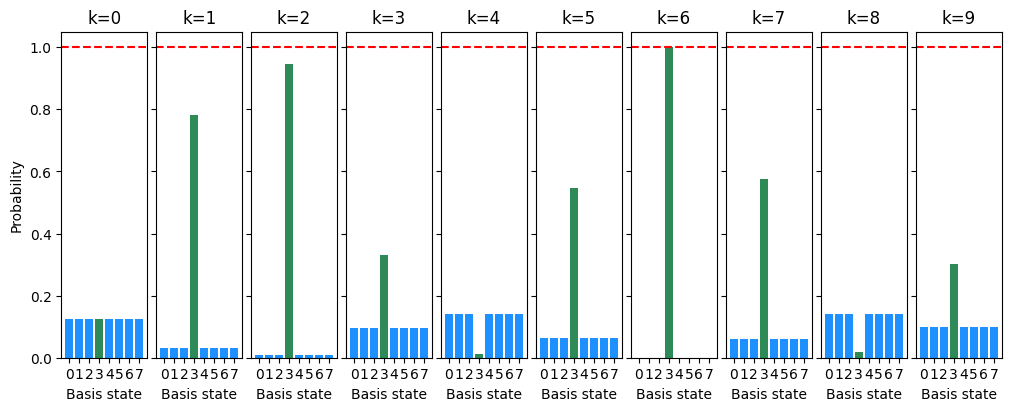

In [34]:
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def grover(k):
    initialize_superposition()
    # ---YOUR CODE HERE---
    # Apply the oracle and diffusion operator k times
    for _ in range(k):
        oracle()
        diffusion_operator()
    
    # --------------------
    return qml.probs()

# Test the function
assert np.allclose(grover(1), [0.03125, 0.03125, 0.03125, 0.78125, 0.03125, 0.03125, 0.03125, 0.03125]), "Incorrect output for Grover with k=1."
assert np.allclose(grover(2), [0.0078125, 0.0078125, 0.0078125, 0.9453125, 0.0078125, 0.0078125, 0.0078125, 0.0078125]), "Incorrect output for Grover with k=2."

# Plot output probabilities for different values of k
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(10,4), sharey=True)
for k in range(0,10):
    ax[k].set_title(f'k={k}')
    probs = grover(k)
    ax[k].bar(range(8), probs)

    # Define colors: all gray, except bar at x=3 is green
    colors = ['dodgerblue'] * 8
    colors[3] = 'seagreen'
    
    ax[k].bar(range(8), probs, color=colors)

    ax[k].set_xticks(range(8))
    ax[k].set_xlabel('Basis state')

    ax[k].axhline(y = 1.0, color = 'r', linestyle = '--')
ax[0].set_ylabel('Probability')
plt.tight_layout(pad = 0.3)

In [35]:
print(grover(6))

[3.05175781e-05 3.05175781e-05 3.05175781e-05 9.99786377e-01
 3.05175781e-05 3.05175781e-05 3.05175781e-05 3.05175781e-05]


<div style="max-width: 1200px; margin: auto; border: 1px solid #004791; border-left: 6px solid #004791; border-radius: 6px; padding: 0.8em 1em; background-color: #1b1b1bff; color: #eee;">

### Question B3.2

Why does the output probability of the target state not reach exactly 1?
</div>

**Answer**: Even though it looks like the probability of the target state is equal to 1 for $k = 6$, it is in fact equal to approximately 0.9998. According to https://pennylane.ai/qml/demos/tutorial_intro_amplitude_amplification, after $k$ iterations the angle of the resulting state is $\measuredangle = (2k + 1)\theta$. This value is calculated in the code block below for $k = 6$ and the initial $\theta$ value found in Question B1.1. Using this angle I calculate the probability of achieving state $\ket{\phi}$ given by $\sin^2{(\measuredangle)}$ which is evaluated to be approximately 0.9998.

The reason the probability of the target state never reaches exactly 1 is because the value of $\theta$ is not a multiple of $\pi$. This means that no matter how many times the oracle is applied we cannot reach the angle of $\frac{\pi}{2}$.

In [50]:
theta = np.arcsin(1 / np.sqrt(8))
ang_k_6 = (2 * 6 + 1) * theta
prob_state_3 = np.sin(ang_k_6)**2

print ("Initial angle value theta =", theta)
print ("Angle for k = 6 is:", ang_k_6)
print ("Probability of target state for k = 6 is:", prob_state_3)
print ("Checking if the initial angle is a multiple of pi:", np.pi / theta)

Initial angle value theta = 0.3613671239067078
Angle for k = 6 is: 4.697772610787201
Probability of target state for k = 6 is: 0.9997863769531249
Checking if the initial angle is a multiple of pi: 8.693631616585137


<div style="max-width: 1200px; margin: auto; border: 1px solid #004791; border-left: 6px solid #004791; border-radius: 6px; padding: 0.8em 1em; background-color: #1b1b1bff; color: #eee;">

### Question B3.3
If implemented correctly, the probabiity of measuring the target state appears to increase and decrease periodically as we apply the Grover operator more times. Explain why we observe this behaviour. 
</div>

**Answer**: This occurs because we are effectively rotating our state around the circle by an angle of $(2k + 1)\theta$ for each incrementing value of $k$. This is where the periodicity comes from.

<div style="max-width: 1200px; margin: auto; border: 1px solid #004791; border-left: 6px solid #004791; border-radius: 6px; padding: 0.8em 1em; background-color: #1b1b1bff; color: #eee;">

###  Optional question
Was there any part of the bonus assignment where you struggled for some "unnecessary" reason? (Errors in the notebook, bad instructions etc.)
</div>

**Answer**: No, overall the notebook was well written.

# Disclosure of AI Usage (Mandatory)
Fill in this part disclosing any AI usage before submitting the assignment by describing your use of LLMs or other AI-based tools in this assignment.

For each task, we ask you to provide information about:
- **Tools/models used**.
- **Per‑task usage**: for each task, a brief summary of what the tool was used for.
- **Prompts/transcripts**: main prompts or a summary of interactions (a link or screenshot is acceptable if long).
- **Validation**: how you checked and verified the correctness of AI-generated outputs (tests run, docs consulted, comparisons, plots etc.).

Disclosure:
- **Task 1**: None

- **Task 2**: None

- **Task 3**: I used ChatGPT to help me understand my plot in Step 4. I thought I made a mistake somewhere and was getting a probability of the target state of 1. A link to the conversation can be found [here](https://chatgpt.com/share/690ce415-45a4-8009-b503-0fe93dbe933d).

If you did not use any AI tools for a given exercise, specify this by writing "None". If you did not complete the bonus exercise (Task 3), you can leave that field empty.